# Chain of Atoms

In [2]:
import numpy as np
import matplotlib.pyplot as plt

For a Hamiltonian describing a chain of atoms, the diagonal elements will have value $E_0+\alpha$. The elements $A_{ij}$, which represent the off-diagonal $<\phi_i | H | \phi_j>$ have value $=t$ if $|i-j| = 1$ and $0$ otherwise*. This is such that the probability of a state to jump to any non-neighbouring state is zero.

*For an infinite chain of atoms however, there should exist periodic boundary conditions. This means that the elements $A_{n0}$ and $A_{0n}$ will be equal to $t$ for an $H$ of size $n$.

## Density of states

Construct the Hamiltonian and find the density of states

In [16]:
def Hamiltonian(n, periodic=False):
    H = np.zeros((n,n))
    for i in range(n):
        H[i][i] = -1
        if periodic:
            a = -1 if i == 0 else i-1
            b = 0 if (i == n-1) else i+1
            H[i][a] = H[i][b] = -2
        else:
            if i != n-1: H[i][i+1] = -2
            if i != 0: H[i][i-1] = -2
    return H

def density_of_states(eigenvalues, bins=30):
    min_val, max_val = np.min(eigenvalues), np.max(eigenvalues)
    edges = np.linspace(min_val, max_val, bins + 1)  
    counts, _ = np.histogram(eigenvalues, bins=edges)  
    bin_centers = 0.5 * (edges[:-1] + edges[1:])  
    return bin_centers, counts

Testing the code for $n=6$ and $n=400$.

Hamiltonian Matrix:
 [[-1. -2.  0.  0.  0.  0.]
 [-2. -1. -2.  0.  0.  0.]
 [ 0. -2. -1. -2.  0.  0.]
 [ 0.  0. -2. -1. -2.  0.]
 [ 0.  0.  0. -2. -1. -2.]
 [ 0.  0.  0.  0. -2. -1.]]


Text(0.5, 1.0, 'Density of States for $n=6$')

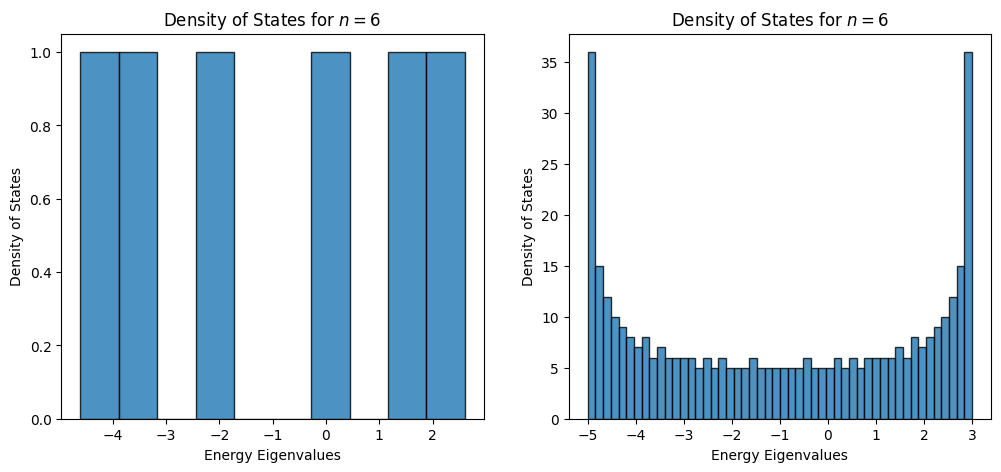

In [26]:
plt.figure(figsize=(12, 5))

H1 = Hamiltonian(6)
print('Hamiltonian Matrix:\n', H1)
eigenvalues1, _ = np.linalg.eig(H1)
bin_centers, counts = density_of_states(eigenvalues1, 10)
plt.subplot(121)
plt.bar(bin_centers, counts, width=(bin_centers[1] - bin_centers[0]), edgecolor='k', alpha=0.8)
plt.xlabel('Energy Eigenvalues')
plt.ylabel('Density of States')
plt.title(r'Density of States for $n=6$')

H2 = Hamiltonian(400)
eigenvalues2, _ = np.linalg.eig(H2)
bin_centers, counts = density_of_states(eigenvalues2, 50)
plt.subplot(122)
plt.bar(bin_centers, counts, width=(bin_centers[1] - bin_centers[0]), edgecolor='k', alpha=0.8)
plt.xlabel('Energy Eigenvalues')
plt.ylabel('Density of States')
plt.title(r'Density of States for $n=6$')

The band structure

Text(0, 0.5, 'Energy')

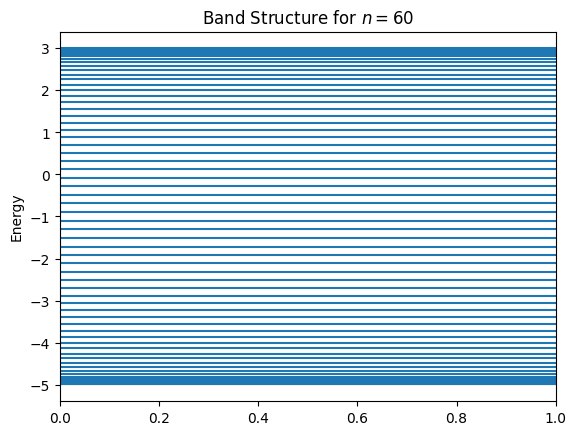

In [31]:
H3 = Hamiltonian(60)
eigenvalues3, _ = np.linalg.eig(H3)
for e in eigenvalues3:
    plt.axhline(e)
plt.title(r'Band Structure for $n=60$')
plt.ylabel('Energy')

Hence we can see that the density of states is maximum near the boundaries.

## Probability distribution over a chain of atoms

The general solution for a Hamiltonian $\phi$ is given by the summation $\sum_{i=0}^n c_i \phi_i$. The eigenvectors we obtained in the previous part represent the probability amplitudes $c_i$ of each eigenvalue.

Using an appropriate polynomial fitting, we can plot the spatial distribution of the probabiliy amplitude for each eigenvalue.

Here for example, we consider 6 atoms in a chain. The x-axis is divided into 6 bins representing each of the 6 atom as a potential well. The y-axis shows the eigenfunction for each eigenvalue along the chain. I have used a polynomial fitting of degree 5 in particular to generate smooth wavefunctions.

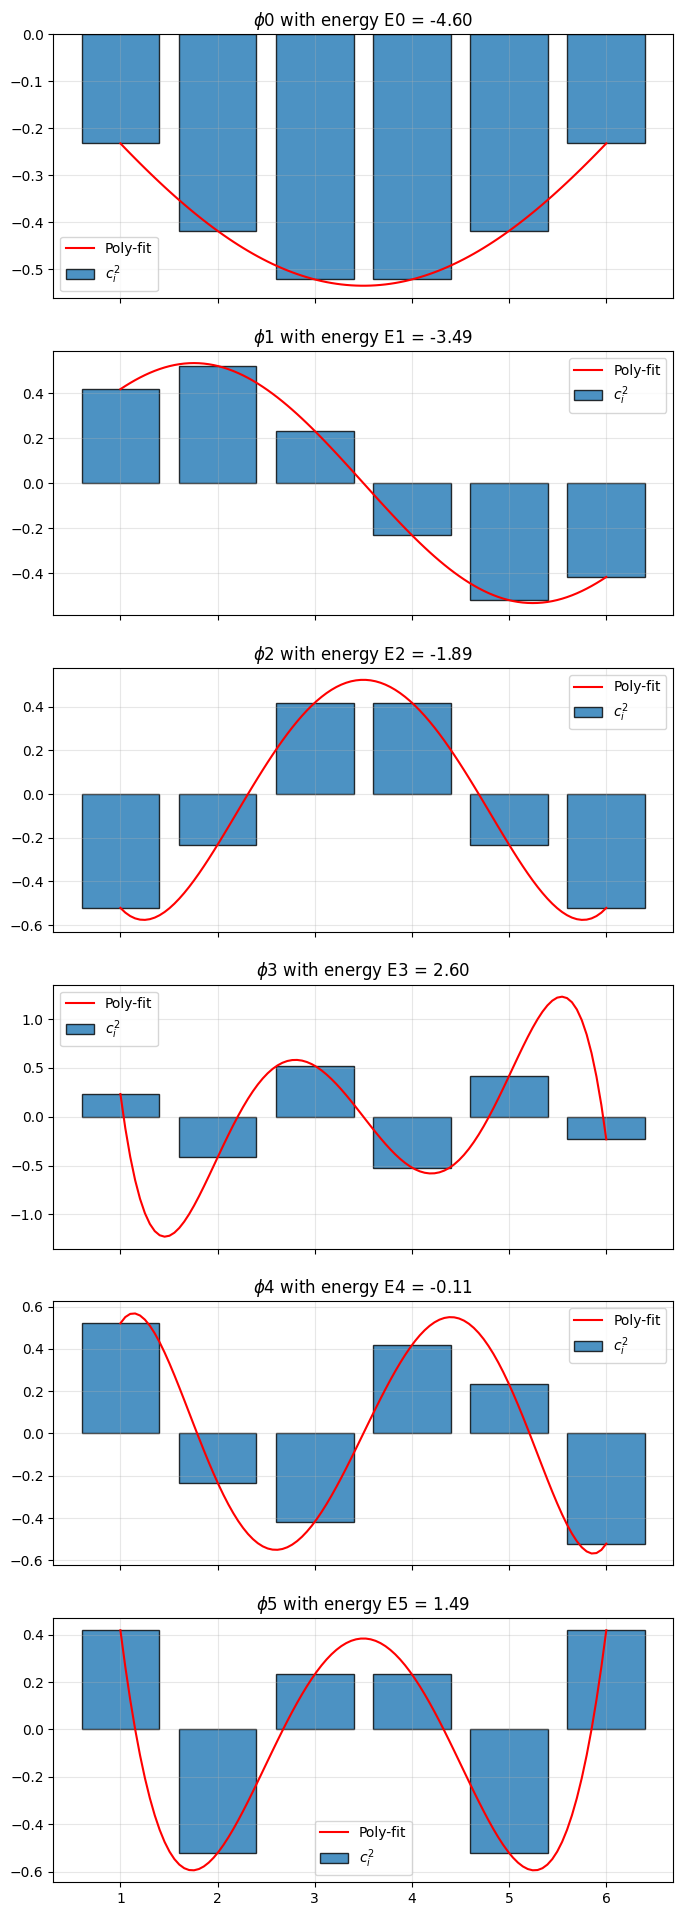

In [97]:
H = Hamiltonian(6)
eigenvalues, eigenvectors = np.linalg.eig(H)
fig, ax = plt.subplots(6, 1, figsize=(8, 24), sharex=True)
for i in range(6):
    eigenvector = eigenvectors[:,i]
    xs = np.arange(1, 7)
    ax[i].grid(alpha=0.3)
    ax[i].bar(xs, eigenvector, edgecolor='k', alpha=0.8, label=r'$c_i^2$')

    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    ax[i].plot(xFit, poly_fit(xFit), 'r', label='Poly-fit')
    ax[i].set_title(r'$\phi$'+f'{i} with energy E{i} = {eigenvalues[i]:.2f}')
    ax[i].legend()

The probability amplitude $|\phi_i|^2$ will represent the spatial distribution of the electrons.

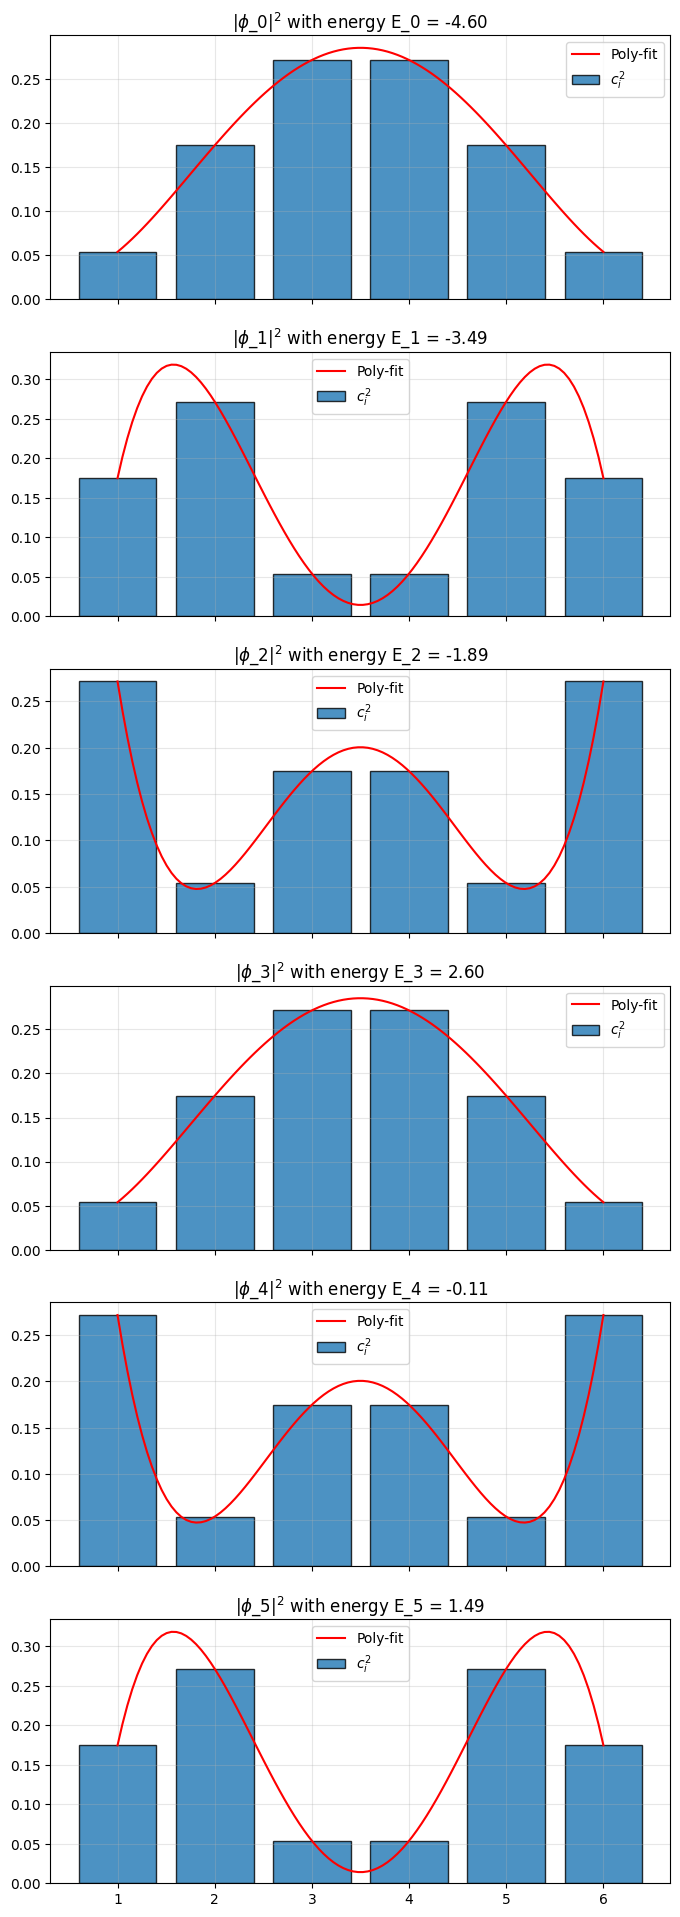

In [68]:
fig, ax = plt.subplots(6, 1, figsize=(8, 24), sharex=True)
for i in range(6):
    eigenvector = np.power(eigenvectors[:,i],2)
    xs = np.arange(1, 7)
    ax[i].grid(alpha=0.3)
    ax[i].bar(xs, eigenvector, edgecolor='k', alpha=0.8, label=r'$c_i^2$')

    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    ax[i].plot(xFit, poly_fit(xFit), 'r', label='Poly-fit')
    ax[i].set_title(r'$|\phi$_'+f'{i}' +'$|^2$'+f' with energy E_{i} = {eigenvalues[i]:.2f}')
    ax[i].legend()

## Spatial distribution of electrons across the energy band

Now, if we plot the energy on the y-axis instead, we'll get the probability amplitudes of the electrons along with the corresponding energy band.

array([1., 1., 1., 1., 1., 1.])

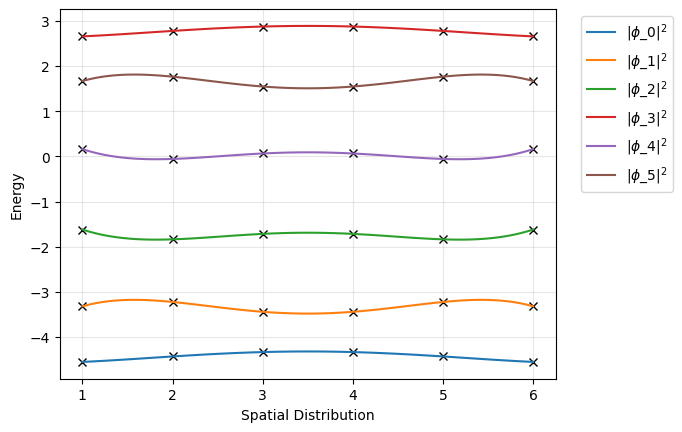

In [100]:
for i in range(6):
    eigenvector = np.power(eigenvectors[:,i],2)
    xs = np.arange(1, 7)
    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    plt.plot(xs, poly_fit(xs) + eigenvalues[i], 'kx')
    plt.plot(xFit, poly_fit(xFit) + eigenvalues[i], label=r'$|\phi$_'+str(i)+r'$|^2$')

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.25, 1))
plt.xlabel('Spatial Distribution')
plt.ylabel('Energy')

Now for the sake of sanity, let's check if the probability distributions add upto 1.

In [103]:
np.sum(eigenvectors**2, axis=1)

array([1., 1., 1., 1., 1., 1.])

We can now extend this plot for $n=100$ to better visualise the band structure.

Text(0, 0.5, 'Energy')

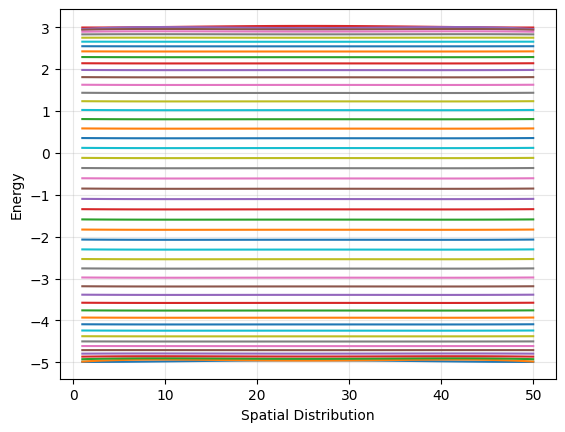

In [95]:
n = 50
H = Hamiltonian(n)
eigenvalues, eigenvectors = np.linalg.eig(H)
for i in range(n):
    xs = np.arange(1, n+1)
    eigenvector = np.power(eigenvectors[:,i], 2)
    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    plt.plot(xFit, poly_fit(xFit) + eigenvalues[i])

plt.grid(alpha=0.3)
plt.xlabel('Spatial Distribution')
plt.ylabel('Energy')

Here we can see that the band distribution of electrons are higher towards the extreme regions as predicted by the density of states.

# Chain of atoms with periodic boundary conditions

Now, let us redo all our code with periodic B.C.

Hamiltonian Matrix:
 [[-1. -2.  0.  0.  0. -2.]
 [-2. -1. -2.  0.  0.  0.]
 [ 0. -2. -1. -2.  0.  0.]
 [ 0.  0. -2. -1. -2.  0.]
 [ 0.  0.  0. -2. -1. -2.]
 [-2.  0.  0.  0. -2. -1.]]


Text(0.5, 1.0, 'Density of States for $n=400$')

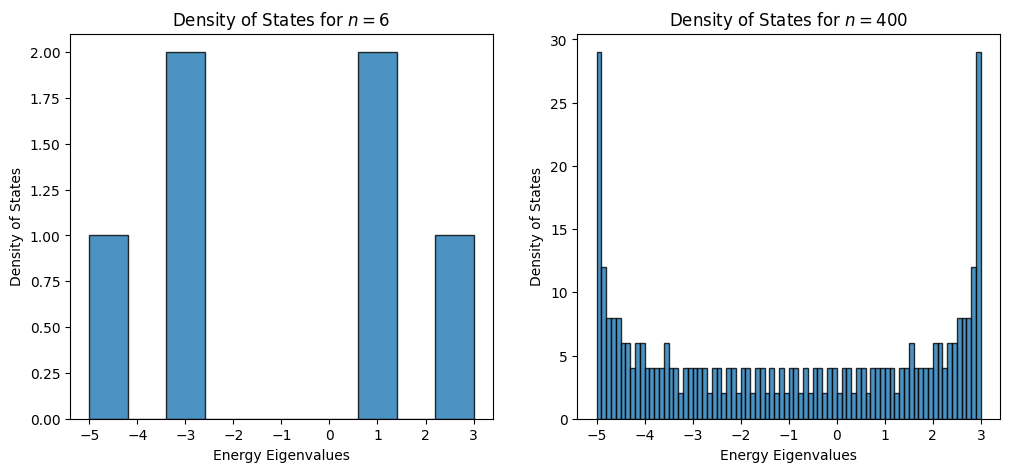

In [118]:
plt.figure(figsize=(12, 5))

H1 = Hamiltonian(6, True)
print('Hamiltonian Matrix:\n', H1)
eigenvalues1, _ = np.linalg.eig(H1)
bin_centers, counts = density_of_states(eigenvalues1, 10)
plt.subplot(121)
plt.bar(bin_centers, counts, width=(bin_centers[1] - bin_centers[0]), edgecolor='k', alpha=0.8)
plt.xlabel('Energy Eigenvalues')
plt.ylabel('Density of States')
plt.title(r'Density of States for $n=6$')

H2 = Hamiltonian(400, True)
eigenvalues2, _ = np.linalg.eig(H2)
bin_centers, counts = density_of_states(eigenvalues2, 80)
plt.subplot(122)
plt.bar(bin_centers, counts, width=(bin_centers[1] - bin_centers[0]), edgecolor='k', alpha=0.8)
plt.xlabel('Energy Eigenvalues')
plt.ylabel('Density of States')
plt.title(r'Density of States for $n=400$')

There seems to be a dip in the density of states for the extreme values for $n=6$. The electron has higher chances of being found not at the edges of the chain as previously seen. However this effect is less noticabe for higher values of $n$. Let us now see the eigen value distribution.

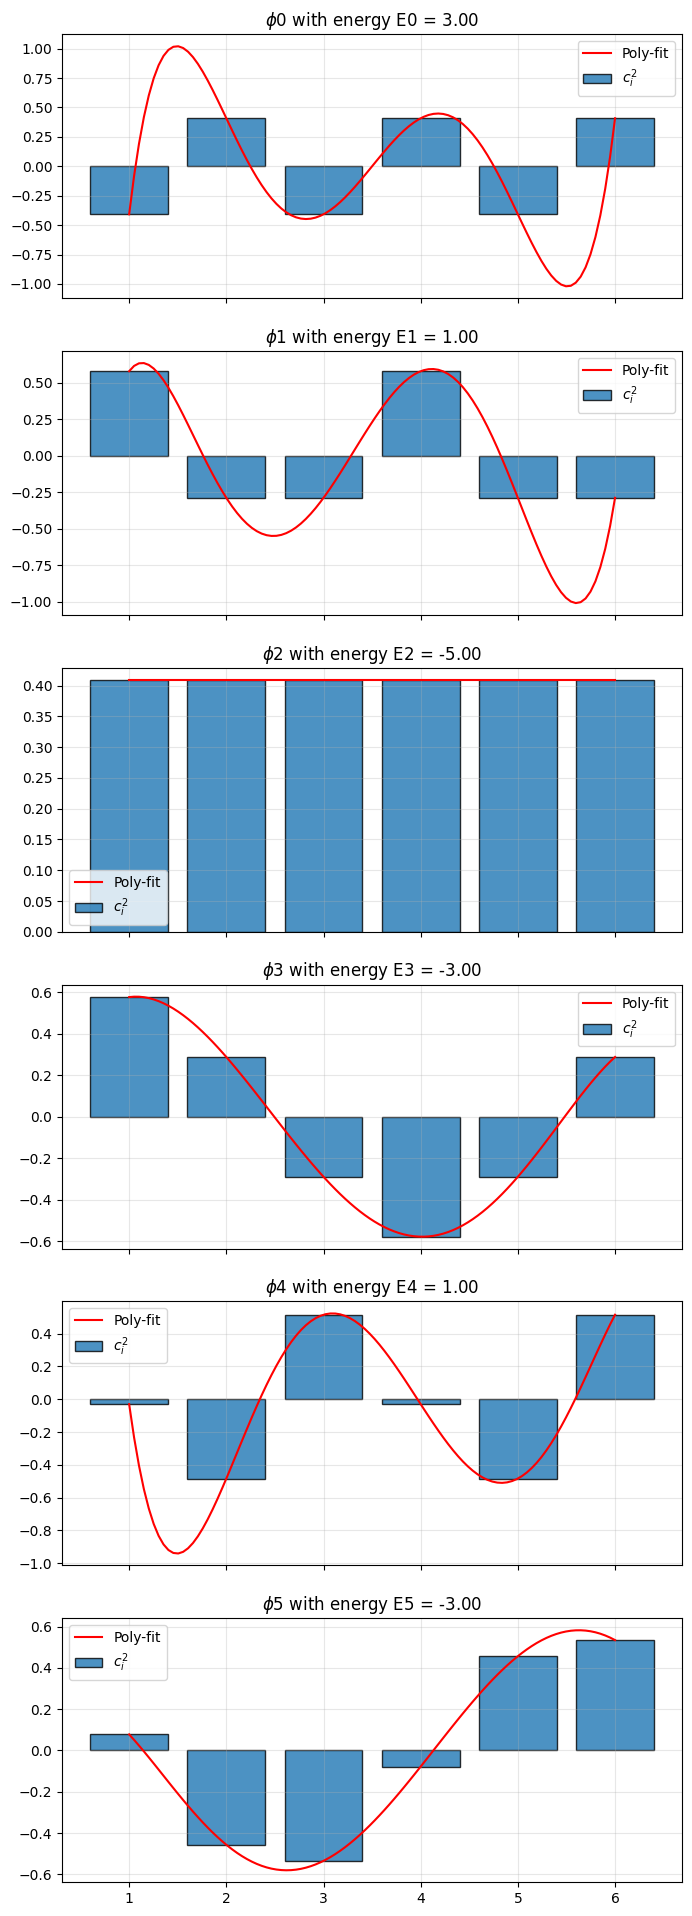

In [105]:
H = Hamiltonian(6, True)
eigenvalues, eigenvectors = np.linalg.eig(H)
fig, ax = plt.subplots(6, 1, figsize=(8, 24), sharex=True)
for i in range(6):
    eigenvector = eigenvectors[:,i]
    xs = np.arange(1, 7)
    ax[i].grid(alpha=0.3)
    ax[i].bar(xs, eigenvector, edgecolor='k', alpha=0.8, label=r'$c_i^2$')

    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    ax[i].plot(xFit, poly_fit(xFit), 'r', label='Poly-fit')
    ax[i].set_title(r'$\phi$'+f'{i} with energy E{i} = {eigenvalues[i]:.2f}')
    ax[i].legend()

The major difference observed is that all spatial locations seems to be equally likely for eigenvalue $-5$. Now consider the band structed formed from the probability amplitudes.

Text(0, 0.5, 'Energy')

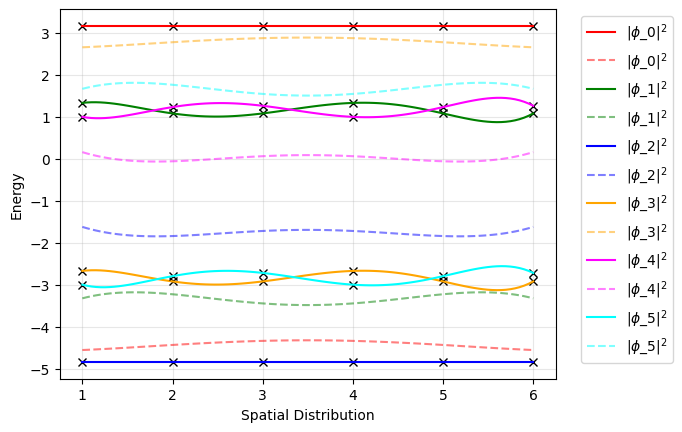

In [110]:
H1 = Hamiltonian(6)
eigenvalues1, eigenvectors1 = np.linalg.eig(H1)
colors = ['r', 'g', 'b', 'orange', 'magenta', 'cyan']

for i in range(6):
    eigenvector = np.power(eigenvectors[:,i],2)
    eigenvector1 = np.power(eigenvectors1[:,i],2)
    xs = np.arange(1, 7)
    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_coeffs1 = np.polyfit(xs, eigenvector1, 5)
    poly_fit = np.poly1d(poly_coeffs)
    poly_fit1 = np.poly1d(poly_coeffs1)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    plt.plot(xs, poly_fit(xs) + eigenvalues[i], 'kx')
    # plt.plot(xs, poly_fit1(xs) + eigenvalues1[i], 'kx')
    plt.plot(xFit, poly_fit(xFit) + eigenvalues[i], color=colors[i], label=r'$|\phi$_'+str(i)+r'$|^2$')
    plt.plot(xFit, poly_fit1(xFit) + eigenvalues1[i], color=colors[i], linestyle='--', alpha=0.5, label=r'$|\phi$_'+str(i)+r'$|^2$')

plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.25, 1))
plt.xlabel('Spatial Distribution')
plt.ylabel('Energy')

For periodic boundary conditions, we can see that the probability amplitude is uniform for the extreme ends of the eigenvalue spectrum. The dotted lines here indicate the non-periodic boundary condition amplitudes for reference.

Extending to higher values of $n$,

Text(0, 0.5, 'Energy')

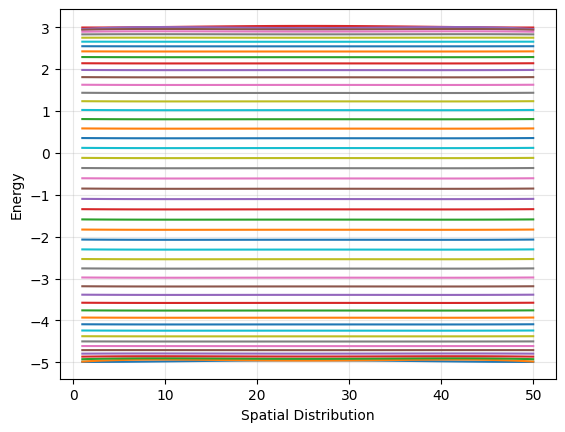

In [111]:
n = 50
H2 = Hamiltonian(n)
eigenvalues2, eigenvectors2 = np.linalg.eig(H2)
for i in range(n):
    xs = np.arange(1, n+1)
    eigenvector = np.power(eigenvectors2[:,i], 2)
    poly_coeffs = np.polyfit(xs, eigenvector, 5)
    poly_fit = np.poly1d(poly_coeffs)
    xFit = np.linspace(np.min(xs), np.max(xs), 100)
    plt.plot(xFit, poly_fit(xFit) + eigenvalues2[i])

plt.grid(alpha=0.3)
plt.xlabel('Spatial Distribution')
plt.ylabel('Energy')

Here, the effects of periodic boundary conditions are less noticable for higher values of $n$. This makes sense as the length of the chain increases, the periodicity also decreases and its effects seem to have less and less impact.